A classification is something where you identify something from a a list of possible options.
Binary Classification.
Multiclass Classification.
Multilabel Classification.

In [1]:
#importing libraries
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
x[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [2]:
import pandas as pd
#convert data to dataframe
circles=pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


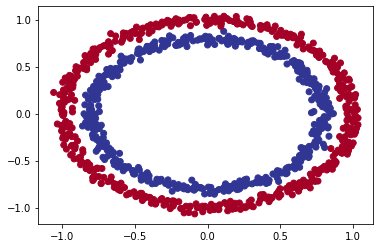

In [3]:
#visualize data as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

Our aim is to classify a given point is a part of circle with red group or circle with blue group.

In [4]:
# Input and output shapes
#check the shapes
x.shape,y.shape

((1000, 2), (1000,))

In [5]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Create the model
Compile the model.
Fit the model
Evaluate the model
Tweak & evalute again

In [6]:
import tensorflow as tf

In [7]:
#set random seed.
tf.random.set_seed=42
#Create a simple model with one layer
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Comple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model.
model_1.fit(x,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 4s 13ms/step - loss: 4.2008 - accuracy: 0.4850
Epoch 2/10
32/32 [==============================] - 0s 12ms/step - loss: 6.2683 - accuracy: 0.5110
Epoch 3/10
32/32 [==============================] - 0s 12ms/step - loss: 5.6539 - accuracy: 0.5790
Epoch 4/10
32/32 [==============================] - 0s 10ms/step - loss: 5.4238 - accuracy: 0.5740
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 5.5522 - accuracy: 0.5240
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 5.2285 - accuracy: 0.5490
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 5.2270 - accuracy: 0.5490
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 5.2273 - accuracy: 0.5490
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 5.2024 - accuracy: 0.5470
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 5.1169 - accuracy: 0.5330


In [8]:
#lets add more layer and see whats happening 
#set ransom seed
tf.random.set_seed=42
#creating the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#complie the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model
model_2.fit(x,y,epochs=100,verbose=0)
#evalute the model 
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4380


[0.6937506794929504, 0.43799999356269836]

In [9]:
#set random seet
tf.random.set_seed=42
#Creating a model
model_3=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)
#Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model
model_3.fit(x,y,epochs=10,verbose=0)
model_3.evaluate(x,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7008 - accuracy: 0.4900


[0.7007557153701782, 0.49000000953674316]

model not showing any improvements. To analyse more and figure out whats happening, lets visualize predictions and the decision boundary

In [10]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
   A function to plot the decision boundary created by the model predction on X 
   """
  #Define aixs boundaries for the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  #Make predictions on on X using the mode
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D array together
  y_pred=model.predict(x_in)
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #We have reshape to make then ready
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  #Plot the descion boundary
  print(xx.shape,yy.shape)
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
Binary Classification
(100, 100) (100, 100)


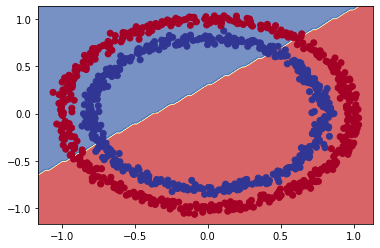

In [11]:
plot_decision_boundary(model_3,x,y)

In [12]:
# Lets try creating our model with a non linear action function
#Set random seed
tf.random.set_seed=42
#Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
    
])
#Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
                )
# Fit the model
history=model_4.fit(x,y,epochs=100,verbose=0)
#Evaluate the model
model_4.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 1.0000


[0.046539369970560074, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Classification
(100, 100) (100, 100)


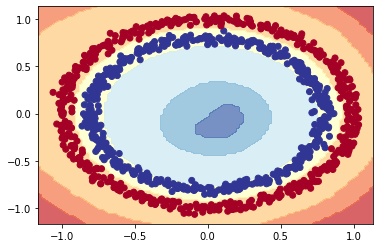

In [13]:
plot_decision_boundary(model_4,x,y)

In [14]:
#set the random seed
tf.random.set_seed=42
#creating the model
model_5=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(1),
    ]
)
#Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
#Fit the model
history=model_5.fit(x,y,epochs=1000,verbose=0)
#evalute the model
model_5.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9880


[0.028821662068367004, 0.9879999756813049]

313/313 [==============================] - 1s 1ms/step
Binary Classification
(100, 100) (100, 100)


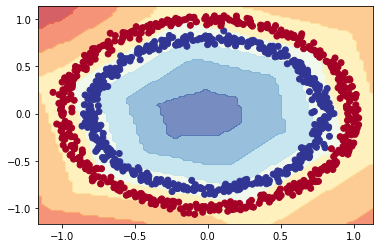

In [15]:
# Visualise the boundary
plot_decision_boundary(model_5,x,y)

In [16]:
#set the random seed
tf.random.set_seed=42
#Create the model
model_6=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)
#compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
#fit the  model
history=model_6.fit(x,y,epochs=100,verbose=0)
#evaluate the model
model_6.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8520


[0.3708879351615906, 0.8519999980926514]

313/313 [==============================] - 1s 2ms/step
Binary Classification
(100, 100) (100, 100)


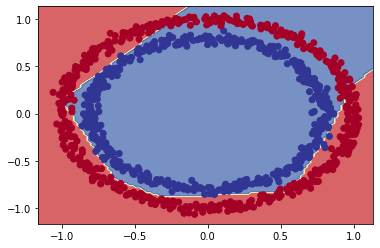

In [17]:
#plot decion boudary
plot_decision_boundary(model_6,x,y)

Now the model is working as expected. Lets save the the model. But we have evaluate the model with same training data.